 <center> <h1> Face, Eyes and Smile Detection </h1></center>

#### Importing the OpenCV Library

In [1]:
import cv2

#### Loading the Casacade
- You can check all the available casacade's on the following link: 
https://github.com/opencv/opencv/tree/master/data/haarcascades
<br>
<br>
- I have downloaded (available in the folder) : <br>
    1) haarcasacade for Frontal Face <br>
    2) haarcasacade for Eye<br>
    3) haarcasacade for Smile<br>

In [2]:
# Lodaing the Casacade
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

#### Defining a function that will do the detection

In [3]:
def detect(gray, frame):
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 3)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
        smiles = smile_cascade.detectMultiScale(roi_gray, 1.7, 22)
        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (0, 0, 255), 2)
    return frame

#### Doing some Face Recognition with webcam
- Running the below cell will start the web camera.
- It will detect face, eyes, smile in real time video captured by the web camera. 

In [ ]:
video_capture = cv2.VideoCapture(0)
while True:
    _, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    canvas = detect(gray, frame)
    cv2.imshow('Video',canvas)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()

#### Test Output:

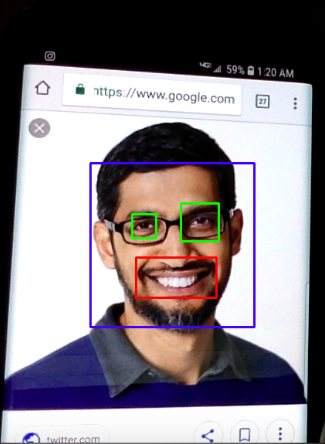

In [4]:
from IPython.display import Image
Image("Image/Test.png")